# Tópico 08 – Iteração [<img src="images/colag_logo.svg" style="float: right; vertical-align: middle; width: 42px; height: 42px;">](https://colab.research.google.com/github/urielmoreirasilva/urielmoreirasilva.github.io/blob/main/aulas/T%C3%B3pico%2008/08%20%E2%80%93%20Iteracao.ipynb) [<img src="images/github_logo.svg" style="float: right; margin-right: 12px; vertical-align: middle; width: 36px; height: 36px;">](https://github.com/urielmoreirasilva/urielmoreirasilva.github.io/blob/main/aulas/T%C3%B3pico%2008/08%20%E2%80%93%20Iteracao.ipynb)

Vamos aprender sobre os _laços_ (_loops_) em Python e um pouco sobre como gerar dados.

### Resultados Esperados
1. Entender como funcionam _loops_ do tipo `for`.
1. Aprender um pouco sobre a geração de números aleatórios via `np.random`.

### Referências
- [CIT, Capítulo 9](https://inferentialthinking.com/)

Material adaptado do [DSC10 (UCSD)](https://dsc10.com/) por [Flavio Figueiredo (DCC-UFMG)](https://flaviovdf.io/fcd/) e [Uriel Silva (DEST-UFMG)](https://urielmoreirasilva.github.io)

In [1]:
# Importando BabyPandas e Numpy
import babypandas as bpd
import numpy as np

## Booleanos

### Recapitulação: Variáveis Booleanas

- Quando comparamos dois valores, o resultado é sempre `True` ou `False`.
- Observe que essas palavras não estão entre aspas!
- `bool` é um tipo de dado em Python, assim como `int`, `float` e `str`.
- O nome `bool` é um diminutivo de "boolean" (ou "variável booleana"), em homenagem a George Boole, um dos primeiros matemáticos e lógicos.

- Existem apenas dois valores booleanos possíveis: `True` ou `False`.
- Esses valores possuem analogia direta com vários estados da natureza:
    - Sim ou não;
    - Ligado ou desligado;
    - 1 ou 0.

- Existem vários tipos de _operadores de comparação_, e todos eles têm como resultado variáveis booleanas: 

|símbolo|significado|
|--------|--------|
|`==` |igual a |
|`!=` |diferente de |
|`<`|menos que|
|`<=`|menor ou igual a|
|`>`|maior que|
|`>=`|maior ou igual a|


In [2]:
# Lembre que "=" é um operador de atribuição, não de comparação!
capstone = 'finished'
units = 123

In [3]:
capstone == 'finished'

True

In [4]:
units >= 180

False

In [5]:
type(units >= 180)

bool

### Operadores booleanos

Existem três operadores que nos permitem realizar aritmética com booleanos: `not`, `and` e `or`.

#### Operador `not`

O operador `not` faz com que `True` $\longrightarrow$ `False`.

In [6]:
capstone

'finished'

In [7]:
capstone == 'finished'

True

In [8]:
not capstone == 'finished'

False

#### Operador `and`

O operador `and` opera entre dois `bool`s. É `True` se **ambos** forem `True`, e `False` se **ambos** forem `False`.

In [9]:
capstone

'finished'

In [10]:
units

123

In [11]:
capstone == 'finished' and units >= 180

False

In [12]:
capstone == 'finished' and units >= 120

True

#### Operador `or`

O operador `or` opera entre dois `bool`s. É `True` se **pelo menos um** dos `bools` for `True`, e `False` apenas **ambos** se forem `False`.

In [13]:
capstone

'finished'

In [14]:
units

123

In [15]:
capstone == 'finished' or units >= 180

True

In [16]:
# Ambos são `True`!
capstone == 'finished' or units >= 0

True

In [17]:
# Ambos são `False`!
capstone == 'not started' or units >= 180

False

### Ordem das operações para operadores booleanos

- O padrão do Python é que a ordem das operações com boolenas seja: `not`, `and` e `or`.
- Você pode consultar a _precedência_ de todos os operadores em Python [aqui](https://www.programiz.com/python-programming/precedence-associativity).

Como comentamos anteriormente, é sempre uma boa prática utilizar parênteses `( )` para tornar a sintaxe mais clara.

In [18]:
capstone

'finished'

In [19]:
units

123

In [20]:
capstone == 'finished' or (capstone == 'in progress' and units >= 180)

True

In [21]:
# Note a diferença do resultado acima!
(capstone == 'finished' or capstone == 'in progress') and units >= 180

False

In [22]:
# Sem os parênteses, o operador `and` tem precedência sobre `or`
capstone == 'finished' or capstone == 'in progress' and units >= 180

True

### Operações com Booleanos podem ser complicadas!

- Tecnicamente, os operadores booleanos são operadores da _Teoria de Conjuntos_.
- Apesar de aparentemente elementares, operações sobre conjuntos podem se tornar complexas muito rapidamente: por exemplo, `not (a and b)` é **diferente** de `not a and not b`!
- Para mais detalhes, veja mais sobre as [Leis de De Morgan](https://blog.penjee.com/what-is-demorgans-law-in-programming-answered-with-pics/).

In [23]:
capstone

'finished'

In [24]:
units

123

In [25]:
not (capstone == 'finished' and units >= 180)

True

In [26]:
(not capstone == 'finished') and (not units >= 180)

False

### Nota: `&` e `|` vs. `and` e `or`

- Nesse curso, utilizamos os operadores `&` e `|` entre duas `Series`.
- A aritmética desses operadores será então feita elemento-a-elemento, isto é, separadamente para cada linha da `Series`.

A utilização desses operadores é especialmente relevante ao realizarmos consultas em um `DataFrame`, como por exemplo `df[(df.get('capstone') == 'concluído') & (df.get('units') >= 180)]`.

- Em geral, os operadores `and` e `or` operam entre dois booleanos **individuais**.

Uma instância desse uso no exemplo acima é avaliar `capstone == 'finished' and units >= 180`.

### Exercício ✅

Suponha que tenhamos `a = True` e `b = True`. Qual é o valor da expressão a seguir?

```py
not (((not a) and b) or ((not b) or a))
```

A. `True`

B. `False`

C. Nenhuma das anteriores.

D. Ambas A. e B. estão corretas.

### O operador `in`

Além das comparações detalhadas acima, frequentemente estamos interessados em verificar se um elemento específico está em uma `List`/`array` ou se uma **substring** específica pertence à uma string maior. 

Nesses casos, podemos utilizar o operador `in`:

In [27]:
3 in [1, 2, 3]

True

In [28]:
'hey' in 'hey my name is'

True

In [29]:
'dog' in 'hey my name is'

False

## Estruturas condicionais

### instruções `if`

- Frequentemente, desejamos executar um bloco de código apenas se uma expressão condicional específica for igual `True`.
- A sintaxe para isso é a seguinte (_não se esqueça dos dois pontos!_):


```py
if <condition>:
    <body>
```

Nota: o espaçamento no Python é muito importante, então o **recuo extra** no código acima deve ser sempre respeitado!

In [30]:
capstone = 'finished'
capstone

'finished'

In [31]:
if capstone == 'finished':
    print('Looks like you are ready to graduate!')

Looks like you are ready to graduate!


### instruções `else`

- Instruções do tipo `else` acompanham instruções do tipo `if`.
- O `else` especifica o que fazer caso a condição especificada no `if` for igual a `False`.

In [32]:
capstone = 'finished'
capstone

'finished'

In [33]:
if capstone == 'finished':
    print('Looks like you are ready to graduate!')
else:
    print('Before you graduate, you need to finish your capstone project.')

Looks like you are ready to graduate!


In [34]:
capstone_2 = 'unfinished'
capstone_2

'unfinished'

In [35]:
if capstone_2 == 'finished':
    print('Looks like you are ready to graduate!')
else:
    print('Before you graduate, you need to finish your capstone project.')

Before you graduate, you need to finish your capstone project.


### instruções `elif`

- Quando quisermos verificar mais de uma condição alternativa (isto é, mais de uma condição quando `if` == `False`), utilizamos instruções do tipo `elif`..
- Em essência, `elif` verifica a próxima condição se a condição especificada for `False`.
- A vantagem de utilizarmos o `elif` é que podemos assim avaliar várias condições em sequência, até uma delas resultar em `True`. 
- Ao final do `elif`, se nenhuma das condições for `True`, o `else` é executado (assumindo que o mesmo exista).

In [36]:
capstone = 'in progress'
units = 123

In [37]:
if capstone == 'finished' and units >= 180:
    print('Looks like you are ready to graduate!')
elif capstone != 'finished' and units < 180:
    print('Before you graduate, you need to finish your capstone project and take', 180 - units, 'more units.')
elif units >= 180:
    print('Before you graduate, you need to finish your capstone project.')
else:
    print('Before you graduate, you need to take', 180 - units, 'more units.')

Before you graduate, you need to finish your capstone project and take 57 more units.


### Exercício ✅

Utilizando as estruturas condicionais, complete a definição da função `grade_converter` abaixo, que recebe uma nota em 100 (`grade`) e retorna o conceito correspondente (de `A` a `B`), conforme a seguinte tabela:

| Carta | Alcance |
| --- | --- |
| Um | [90, 100] |
| B | [80, 90) |
| C | [70, 80) |
| D | [60, 70) |
| F | [0, 60)

In [38]:
def grade_converter(grade):
    ...

In [39]:
# O resultado dessa chamada deve ser igual a 'B'
grade_converter(84)

In [40]:
# O resultado dessa chamada deve ser igual a 'D'
grade_converter(60)

### Exercício ✅

Suponha que tenhamos definido uma função `mystery` através das seguintes estruturas condicionais:

```py

def mystery(a, b):
    if (a + b > 4) and (b > 0):
        return 'bear'
    elif (a * b >= 4) or (b < 0):
        return 'triton'
    else:
        return 'bruin'
```

Sem executar nenhum código, responda:
1. O que `mystery(2, 2)` retorna?
1. Encontre entradas `a` e `b` tais que uma `mystery(a, b)` retorne `'bruin'`.

## Iteração

![](images/iteration.png)

### loops `for`

In [41]:
import time

print('Launching in...')

for x in [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]:
    print('t-minus', x)
    time.sleep(0.5) # Pauses for half a second
    
print('Blast off! 🚀')

Launching in...
t-minus 10
t-minus 9
t-minus 8
t-minus 7
t-minus 6
t-minus 5
t-minus 4
t-minus 3
t-minus 2
t-minus 1
Blast off! 🚀


### `for`

- Os _loops_ nos permitem repetir a execução de alguma parte do nosso código.
- Existem dois tipos de loops em Python; o loop `for` é um deles.

- A sintaxe de um loop `for` é a seguinte:
```py
for <element> in <sequence>:
    <for body>
```

Podemos ler os comandos acima informalmente como: "para cada \<elemento> da <sequência>, execute esse <código>".

- Nota: listas, arrays e strings são exemplos importantes de sequências!
- Observe que, assim como nas instruções `if`, o recuo aqui é importante!

### Exemplo: Quadrados de números inteiros

In [42]:
num = 4
print(num, 'squared is', num ** 2)

num = 2
print(num, 'squared is', num ** 2)

num = 1
print(num, 'squared is', num ** 2)

num = 3
print(num, 'squared is', num ** 2)

4 squared is 16
2 squared is 4
1 squared is 1
3 squared is 9


In [43]:
# A sequência utilizada para o loop não precisa necessariamente ser ordenada!
list_of_numbers = [4, 2, 1, 3]

for num in list_of_numbers:
    print(num, 'squared is', num ** 2)

4 squared is 16
2 squared is 4
1 squared is 1
3 squared is 9


No código acima, a linha `print(num, 'squared is', num ** 2)` é executada quatro vezes:
- Na primeira iteração, `num` = 4.
- Na segunda iteração, `num` = 2.
- Na terceira iteração, `num` = 1.
- Na quarta iteração, `num` = 3.

Note que em lugar algum declaramos atribuímos `num` a nenhum desses elementos com `num =`!

### Exercício ✅

Usando o array `colleges` definido abaixo, escreva um loop `for` que imprima:

```
Revelle College
John Muir College
Thurgood Marshall College
Earl Warren College
Eleanor Roosevelt College
Sixth College
Seventh College
```

In [44]:
colleges = np.array(['Revelle', 'John Muir', 'Thurgood Marshall', 
            'Earl Warren', 'Eleanor Roosevelt', 'Sixth', 'Seventh'])

In [45]:
...

Ellipsis

### Ranges

- Recordemos aqui que cada elemento de uma lista/array possui uma posição numérica.
    - A posição do primeiro elemento é 0, a posição do segundo elemento é 1, etc.
- Dessa forma, podemos escrever um loop `for` que acessa cada elemento em um array, de acordo com sua posição.
- Nesses casos, o método `np.arange` costuma ser bem útil!

#### Exemplo: atividades e sentimentos

In [46]:
actions = np.array(['ate', 'slept', 'exercised'])
feelings = np.array(['content 🙂', 'energized 😃', 'exhausted 😩'])

In [47]:
len(actions)

3

In [48]:
for i in np.arange(len(actions)):
    print(i)

0
1
2


In [49]:
for i in np.arange(len(actions)):
    print('I', actions[i], 'and I felt', feelings[i])

I ate and I felt content 🙂
I slept and I felt energized 😃
I exercised and I felt exhausted 😩


#### Exemplo: Cachinhos Dourados e os Três Ursos

In [50]:
# Em alguns casos, nem precisamos usar a variável do loop!    
for i in np.arange(3):
    print('🐻')
print('👧🏼')

🐻
🐻
🐻
👧🏼


### Randomização e iteração

- Nos próximos tópicos, aprenderemos a **simular** eventos aleatórios, como por exemplo jogar uma moeda.

- Para simular um ou mais eventos, frequentemente iremos: 
    1. Executar um experimento, como por exemplo "jogue 10 moedas";
    1. Anotar algum resultado associado ao experimento, como por exemplo "número de caras":
    1. Repetir as etapas 1 e 2 muitas e muitas vezes utilizando um loop `for`.

### Armazenando os resultados de um loop

- Para armazenar nossos resultados, normalmente utilizaremos uma variável numérica, ou um array.
    - Quando o resultado for uma variável numérica, definimos uma variável (geralmente um `int = 0`) antes do loop, e então utilizamos o operador `+` para somá-la recursivamente dentro do loop.
    - Quando o resultado for um array, criamos um array (geralmente vazio) antes do loop, e então então utilizamos `np.append` para acrescentar elementos à esse array dentro do loop.



![](https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/10-Iteracao/images/append.jpg)


### `np.append`

- Esta função recebe duas entradas:
    - um array;
    - um elemento para adicionar ao final desse array.

- Seguindo o padrão usual, `np.append` retorna um novo array, e não modifica o array existente (a menos que uma nova atribuição for feita).
- Normalmente utilizamos o `np.append` dentro de um loop `for` da seguinte forma: a cada iteração, invocamos `nome_do_array = np.append(nome_do_array, element_to_add)`, e o array cresce em uma linha.

⚠️ Nota: lembre-se sempre de **realizar corretamente a atribuição e armazenar o resultado!**

In [51]:
some_array = np.array([])

In [52]:
np.append(some_array, 'hello')

array(['hello'], dtype='<U32')

In [53]:
some_array

array([], dtype=float64)

In [54]:
# É necessário re-atribuir ou "salvar" o new array!
some_array = np.append(some_array, 'hello')
some_array

array(['hello'], dtype='<U32')

In [55]:
some_array = np.append(some_array, 'there')
some_array

array(['hello', 'there'], dtype='<U32')

#### Exemplo: lançamento de uma moeda

- Definimos abaixo uma função `flip(n)`, que simula o lançamento de `n` moedas justas (isto é, com probabilidade de caras e coroas igual a 50%) e retorna o número de caras observadas.

(Explicaremos os detalhes técnicos dessa construção mais adiante).

In [56]:
def flip(n):
    '''Returns the number of heads in n simulated coin flips, using randomness.'''
    return np.random.multinomial(n, [0.5, 0.5])[0]

In [57]:
# Execute essa célula mais de uma vez: você vai ver resultados diferentes à cada execução!
# (esse comportamento é intencional)
flip(10)

6

Vamos agora repetir o ato de lançar _10 moedas_, _10.000 vezes_.

Faremos isso da seguinte maneira:
1. Para cada uma das 10.000 vezes, utilizamos a função `flip` para lançar `n = 10` moedas e calcular o número de caras observadas.
1. Armazenamos o resultado correspondente em um array, `heads_array`, e repetimos o processo.

In [58]:
# Note que o array `heads_array` inicia esse processo vazio: antes de iniciar a simulação, ainda não lançamos nenhuma moeda!
heads_array = np.array([])

# loop principal
N = 10000
for i in np.arange(N):
    
    # Lançando 10 moedas e retornando o número de caras
    num_heads = flip(10)
    
    # Agregando os resultados no array
    heads_array = np.append(heads_array, num_heads)

Após a execução do loop, `heads_array` contém 10.000 elementos, cada um correspondendo ao número de caras em 10 lançamentos de moeda simulados.

In [59]:
# Tente executar a célula acima e verifique se esse array se modifica!
heads_array

array([6., 6., 2., ..., 7., 3., 5.])

In [60]:
# Embora os arrays não sejam idênticos à cada execução, o tamanho deles é sempre o mesmo
len(heads_array)

10000

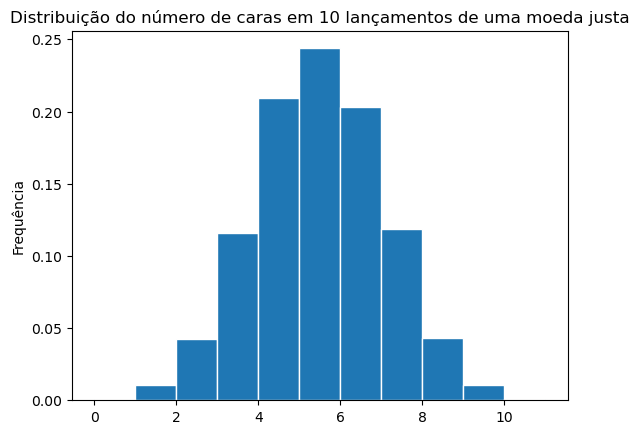

In [61]:
# Elaborando um histograma com os resultados obtidos
(bpd.DataFrame().assign(num_heads = heads_array)
 .plot(kind = 'hist', density = True, bins = np.arange(0, 12), ec = 'w', legend = False,
       title = 'Distribuição do número de caras em 10 lançamentos de uma moeda justa')
).set_ylabel('Frequência');

### Acumuladores

![](https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/10-Iteracao/images/accumulate.jpg)

### loops `for` e acumuladores

- Na maior parte dos casos, quase todos os loops `for` utilizarão o **acumulador padrão**.
- Isso significa que inicializamos uma variável (por exemplo um `int` `i`) e a adicionamos repetidamente dentro de um loop (em geral de `1` em `1` unidades).

In [62]:
# Exemplo de acumulador padrão
for i in np.arange(5):
    print(i)

0
1
2
3
4


- Agora, como as linhas de um `array`, `DataFrame` ou `Series` são naturalmente números inteiros ordenados, é tentador utilizarmos loops `for` para iterar sobre esses elementos.

In [63]:
# Somando sobre todas as linhas de um array
sum_array = np.array([1, 2, 3, 4, 5])

s = 0
for i in np.arange(5):
    s = s + sum_array[i]

s

15

Isso, porém, é uma **má ideia**!

- Não entraremos em detalhes técnicos aqui, mas a utilização de loops `for` para realizar operações matemáticas em DataFrames/arrays/séries é muito ineficiente do ponto de vista computacional
    - Isso tem a ver com o fato do Python ser uma linguagem _interpretada_.
    - O pessoal do DSC10 preparou um [breve vídeo](https://www.youtube.com/watch?v=BlczSBT80fU) sobre o assunto 🎥.

- O ideal é sempre manipularmos esses objetos utilizando os métodos e funções especificamente desenvolvidos para tal: consultas, GroupBy, indexação, transmissão/vetorização, etc.

### Iterando sobre strings

- Como strings são sequências de caracteres, naturalmente podemos iterar sobre elas!

In [64]:
for letter in 'UFMG':
    print(letter.upper())

U
F
M
G


In [65]:
'Minas Gerais'.count('a')

2

### Exercício ✅

Complete na célula abaixo a implementação da função `vowel_count`, que retorna o número de vogais na string de entrada `s` (incluindo repetições).

In [66]:
def vowel_count(s):
    
    # Uma boa ideia é começar com um contador para as vogais, começando em 0.
    number = 0
    
    # Para cada uma das 5 vogais:
       
        # Conte o número de ocorrências dessa vogal em `s` (dica: utilize alguma estrutura condicional adequada).

        # Adicione o número acima à `number`.
    
    # Após passarmos por todas as 5 vogais, retorne a resposta.


In [67]:
# O resultado dessa chamada deve ser igual a '3.
vowel_count('king triton')

In [68]:
# O resultado dessa chamada deve ser igual a '8'.
vowel_count('i go to uc san diego')

## Resumo

- Os operadores Booleanos `and`, `or` e `not` são ferramentas úteis para especificar condições das mais diversas no Python.
- As estruturas condicionais `if`, `else` e `elif` nos permitem executar partes do nosso código dependendo de certas condições serem `True` ou `False`.
- Os loops do tipo `for` são utilizados ​​para repetir a execução do código para cada elemento de uma sequência.
    - Listas, arrays e strings são exemplos de sequências.